In [ ]:
Pkg.add("Plots")

In [ ]:
Pkg.add("PlotRecipes")

In [ ]:
Pkg.add("PyPlot")

In [ ]:
Pkg.update()

In [1]:
using Plots, LaTeXStrings

pyplot()

Plots.PyPlotBackend()

In [2]:
f(x,α,β,γ) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x))

f (generic function with 1 method)

In [3]:
function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

In [4]:
α=500.0
β=10.0
γ=2.0
func = x -> f(x,α,β,γ)

(::#1) (generic function with 1 method)

In [5]:
xfin,ffin = iteramapeo(func,10.0,14);


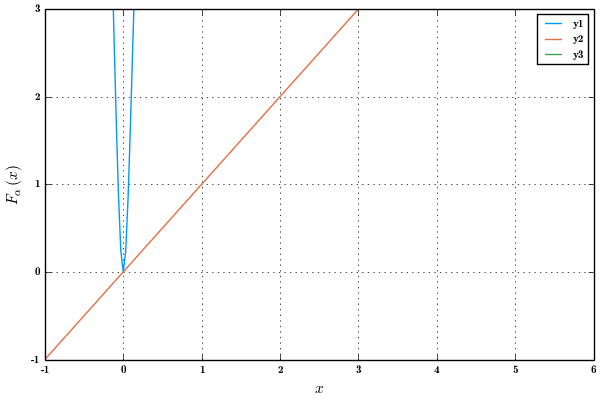

In [6]:
plot(-10:1/32:10, func, xaxis=(L"x", (-1.0, 6.0)), yaxis=(L"F_\alpha(x)",(-1.0,3.0)))
plot!(-10:1/32:10, identity)
plot!(xfin, ffin, marker=(:dot, 3, 0.4))

In [7]:
α=500.0
β=10.0
γ=2.0
func = x -> f(x,α,β,γ)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


(::#3) (generic function with 1 method)

In [8]:
xfin,ffin = iteramapeo(func,200.0,10);


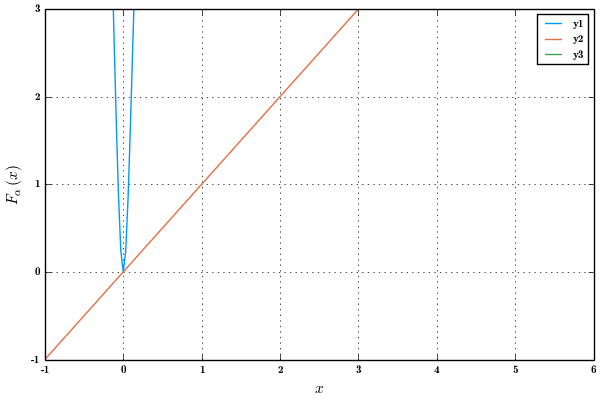

In [9]:
plot(-10:1/32:10, func, xaxis=(L"x", (-1.0, 6.0)), yaxis=(L"F_\alpha(x)",(-1.0,3.0)))
plot!(-10:1/32:10, identity)
plot!(xfin, ffin, marker=(:dot, 3, 0.4))

In [10]:
using Interact 

In [11]:
xfin,ffin = iteramapeo(func,200.0,10);

Interact.Slider{Float64}(Signal{Float64}(100.0, nactions=0),"γ",100.0,0.0:1.0:200.0,".3f",true)


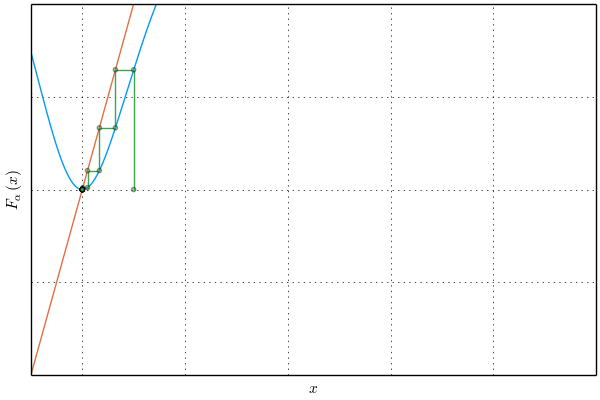

In [51]:
α = 10.0
β= 20.0
@manipulate for γ in 0:1.0:200
    pobla(x)=f(x,α,β,γ)
    xfin,ffin = iteramapeo(pobla,10.0,16);
    plot(-10:1/32:100, pobla, xaxis=(L"x", (-10.0, 100.0)), yaxis=(L"F_\alpha(x)",(-10.0,10.0)))
plot!(-10:1/32:50, identity)
plot!(xfin, ffin, marker=(:dot, 3, 0.4))
end

In [57]:
α = 10.0
β= 20.0
g(x)=(α*(x)^2)/((((α-1.0)*(x^2))/β + x))

g (generic function with 2 methods)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"i",50.0,1.0:1.0:100.0,".3f",true)

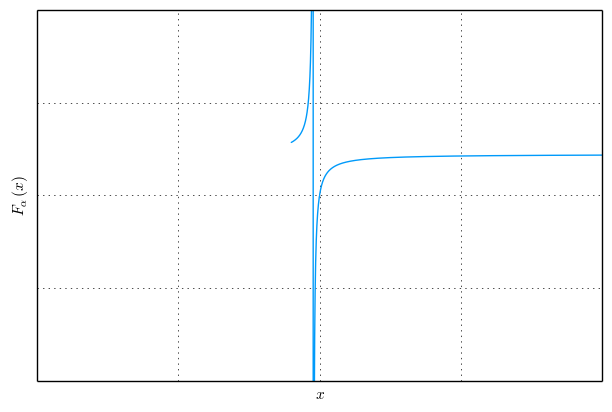


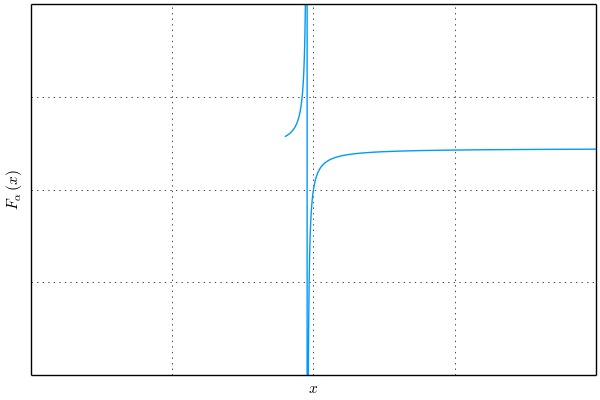

In [65]:

@manipulate for i in 1:1.0:100
    funcion(i)=g(i)
    plot(-10:1/32:100, funcion, xaxis=(L"x", (-100.0, 100.0)), yaxis=(L"F_\alpha(x)",(-100.0,100.0)))
end

Se resolvió la ecuación $N(x)-x=0$ para encontrar los puntos fijos del mapeo en términos de los parámetros R,S y M, obteniendo:

$X_{0}= 0$


y    



$X_{12}= \frac{\pm M(1-R)+\sqrt{R-1}\sqrt{M^{2}(1-R)-4MS}}{2(1-R)}$



Por lo que, para encontrar poblaciones estáticas distintas de cero, tenemos que se deben cumplir las siguientes condiciones:

$R> 1 $ ^ $M > \frac{4S}{R-1}$


In [14]:
Pkg.add("Roots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Roots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [15]:
using Roots

In [16]:
function puntofijo(F::Function, range)
    pf= fzeros(x -> (F(x) - x) , range)
    return pf
end

puntofijo (generic function with 1 method)

In [17]:
α= 10.0
β= 25.0
γ= 50.0

F(x) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x))


F (generic function with 1 method)

In [18]:
pf=puntofijo(F,[0,20.0])

3-element Array{Float64,1}:
  0.0    
  8.33333
 16.6667 

In [19]:
g(x)= (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x)) -x 

g (generic function with 1 method)

In [20]:
α= 10.0
β= 25.0
γ= 50.0
func=x -> g(x)

(::#24) (generic function with 1 method)

A continuación se muestra una gráfica de los puntos fijos del mapeo en términos de los parámetros
$R=10$,$M=25$ y $S=50$.


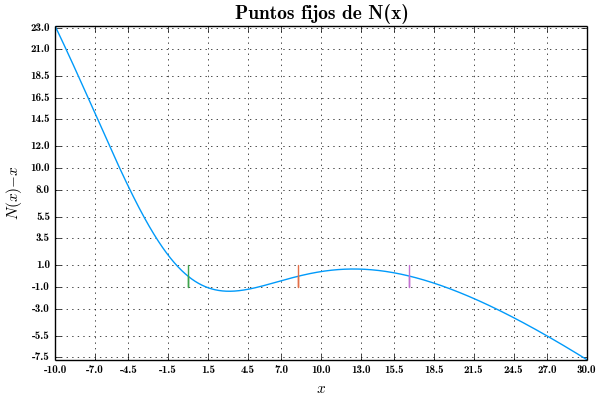

In [21]:
plot(-10:1/32:30, func,xticks=-10:0.5:100,yticks=-10:0.5:50)
xlabel!(L"x")
ylabel!(L"N(x)-x")
title!("Puntos fijos de N(x)")
plot!([8.3,8.3], [1, -1, 0])
plot!([0,0], [1, -1,0])
plot!([16.66,  16.66], [1, -1, 0])

A continuación se muestran graficas que relacionan los parámetros y el comportamiento de los puntos fijos dependiendo de éstos.

La función a estudiar es:

$N(X)-X= \frac{MRX^{2}}{(R-1)X^{2}+M(X+S)} -X $

 Nos interesa encontrar éste mapeo pues nos permite observar el comportamiento de los puntos fijos en función de los parámetros.

En primer lugar, estudiemos a los puntos fijos para distintas $M$ en cada gráfica en función de $R$ y $S$ para una condición inicial fija $X_{0}=10.0$. 

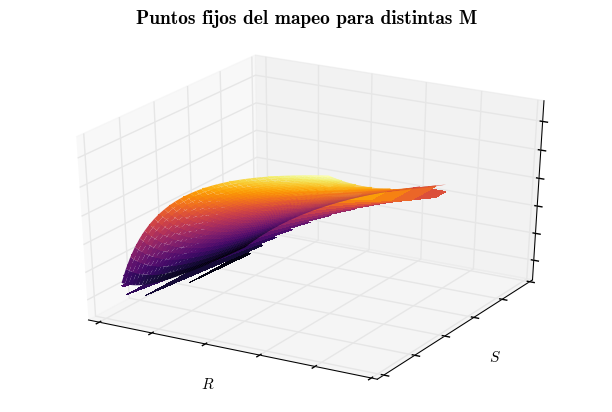

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [29]:
pyplot(leg=false, ticks=nothing)
x = y = linspace(2.0, 40, 40)
zs = zeros(0,40)
x0= 10.0
@gif for i in linspace(1, 80, 5)
    G(x,y) = (x*(x0)^2)/((((x-1.0)*(x0^2))/i + y + x0))-x0

    # create a plot with 3 subplots and a custom layout
   # l = @layout [a{0.9w}]

    plot(x, y, G, st = [:surface, :contourf],xaxis=(L"R",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas M")
        
   end

Ahora estudiamos el comportamiento de los puntos fijos con un valor distinto de $R$ en cada gráfica que varía en función de $M$ y $S$.

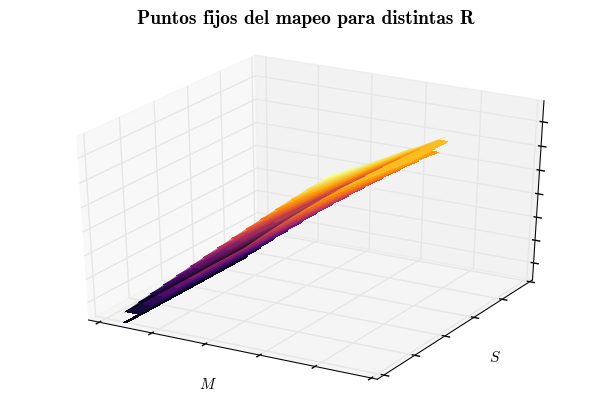

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [30]:
pyplot(leg=false, ticks=nothing)
x = y = linspace(2.0, 40, 40)
zs = zeros(0,40)
x0= 10.0
@gif for i in linspace(1,100,5)
    G(x,y) = (i*(x0)^2)/((((i-1.0)*(x0^2))/x + y + x0))-x0

    # create a plot with 3 subplots and a custom layout
    title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas R")
        
 end

Finalmente, observemos la evolución de los puntos fijos para un valor distinto de $S$ en cada gráfica que se encuentra en
función de $M$ y $R$.

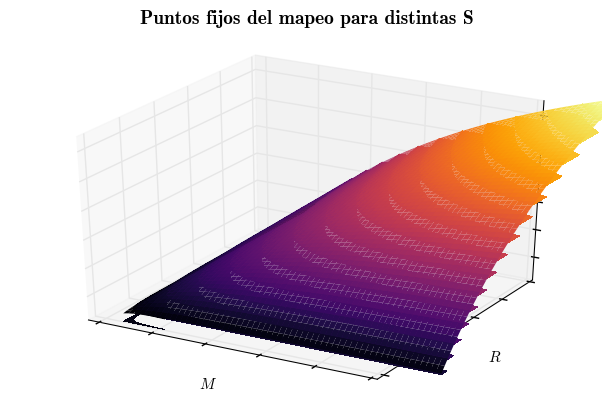

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [31]:
pyplot(leg=false, ticks=nothing)
x = y = linspace(2.0, 60, 60)
zs = zeros(0,60)
x0= 10.0
@gif for i in linspace(1, 80, 5)
    G(x,y) = (y*(x0)^2)/((((y-1.0)*(x0^2))/x + i + x0))-x0

    # create a plot with 3 subplots and a custom layout
       title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0, 50)),yaxis=(L"R",(-1.0, 50)),title="Puntos fijos del mapeo para distintas S")
        
end